In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape

(768, 9)

In [25]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
np.random.seed(42)
sample_25 = df.sample(n=25)
# Mean and max Glucose
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose = sample_25['Glucose'].max()


A. set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

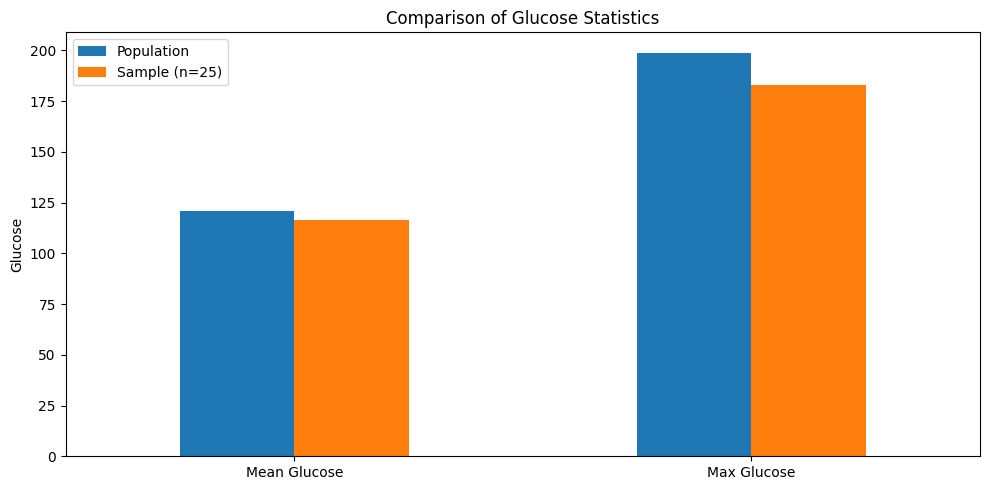

In [5]:
plt.figure(figsize=(10, 5))
bar_data = {
    'Population': [pop_mean_glucose, pop_max_glucose],
    'Sample (n=25)': [sample_mean_glucose, sample_max_glucose]
}
bar_df = pd.DataFrame(bar_data, index=['Mean Glucose', 'Max Glucose'])
bar_df.plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

B. Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

In [6]:
pop_98_bmi = np.percentile(df['BMI'], 98)
sample_98_bmi = np.percentile(sample_25['BMI'], 98)



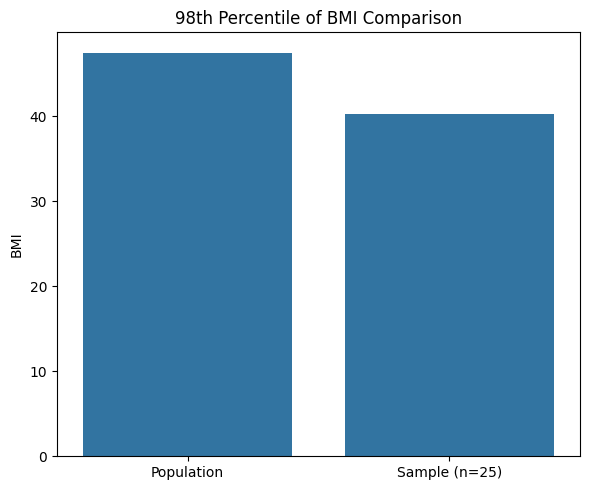

In [7]:
# Plot for part b
plt.figure(figsize=(6, 5))
sns.barplot(x=['Population', 'Sample (n=25)'], y=[pop_98_bmi, sample_98_bmi])
plt.title('98th Percentile of BMI Comparison')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

C. Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (10 points)


In [8]:
# PART C: Bootstrap
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [9]:
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

In [10]:

# Population stats
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp = df['BloodPressure'].std()
pop_98_bp = np.percentile(df['BloodPressure'], 98)

In [11]:
# Create comparison DataFrame
bootstrap_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', '98th Percentile'],
    'Bootstrap': [
        np.mean(bootstrap_means),
        np.mean(bootstrap_stds),
        np.mean(bootstrap_percentiles)
    ],
    'Population': [pop_mean_bp, pop_std_bp, pop_98_bp]
})

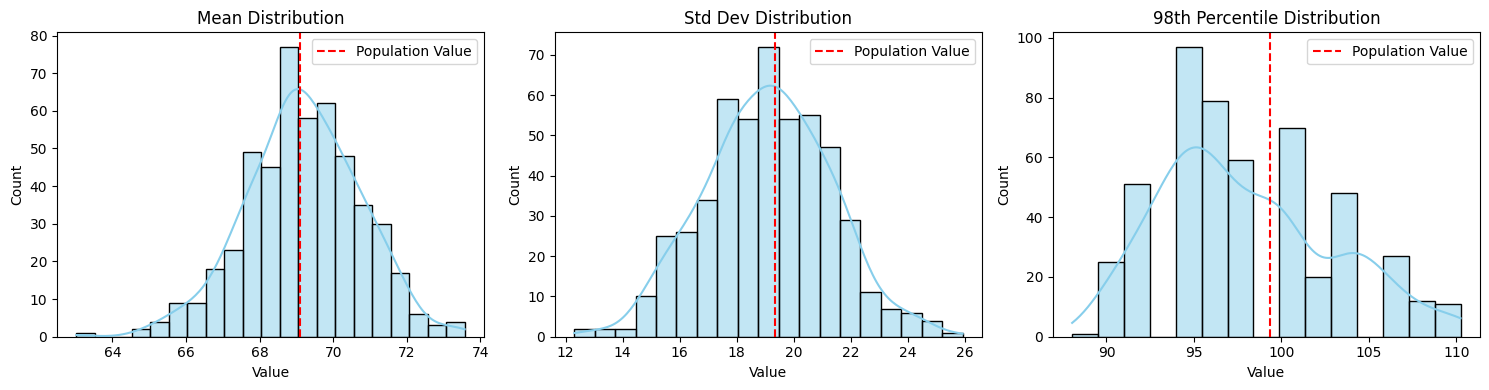

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, stat in enumerate(['Mean', 'Std Dev', '98th Percentile']):
    sns.histplot(bootstrap_df[stat], kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline([pop_mean_bp, pop_std_bp, pop_98_bp][i],
                    color='red', linestyle='--', label='Population Value')
    axes[i].set_title(f'{stat} Distribution')
    axes[i].set_xlabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [21]:
# Print summary
print(bootstrap_summary)

         Statistic  Bootstrap  Population
0             Mean   69.17696   69.105469
1          Std Dev   19.08274   19.355807
2  98th Percentile   97.92404   99.320000


Report:

For mean the bootstrap mean is very close to the population mean, showing that the average BloodPressure from resampling is a good estimator of the true population mean.
 The bootstrap standard deviation is slightly lower than the population's, indicating that the spread in the bootstrap samples is just a bit tighter—but still reasonably accurate. The bootstrap 98th percentile is slightly lower than the population's, possibly due to fewer extreme high values in the samples. Still, it’s a close estimate of the tail behavior.